## CS153 Assignment 2: Image Composition

This notebook provides an introduction to some basic image processing that will extend the tools practiced in Assignment 1 in order to combine multiple images to form a new composition.

The purpose of this notebook is to provide a sandbox environment in which you can test your code and visually inspect the output. Note that when you make changes to a library that has already been imported into a notebook, you must restart the notebook kernel before those changes will be imported. 

You will not turn in this notebook; for code you only need to turn in your `A2.py` file. There will additionally be written questions that you will turn in on Gradescope, including a composition of your own design using this code.

Note that your code will be evaluated in a manner very similar to this notebook (i.e. your `A2.py` file will be imported into a notebook, which will then run and the results inspected by myself or a grutor). That test notebook is not the same as this notebook, however; there will also be some additional tests for your code designed to ensure it is robustly implemented. You are encouraged to add your own tests to this notebook to make sure your code is stable and meets the expectations specified in the assignment.

### Setup

This next cell just sets up the import statements from your `A2.py` file which will contain all of your code for the assignment. Note that we also import plotting tools so we can show images in the notebook.

Note: we imported plotting tools above, but will redundantly do so again so we can skip the Tool Demo if we so choose.

In [1]:
import A2 as A2
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = [13, 10]

### Image Composition

This section will test your function for the assignment, namely:
- `place_object`

This first cell demonstrates the built-in image loader for the provided transparent elements.

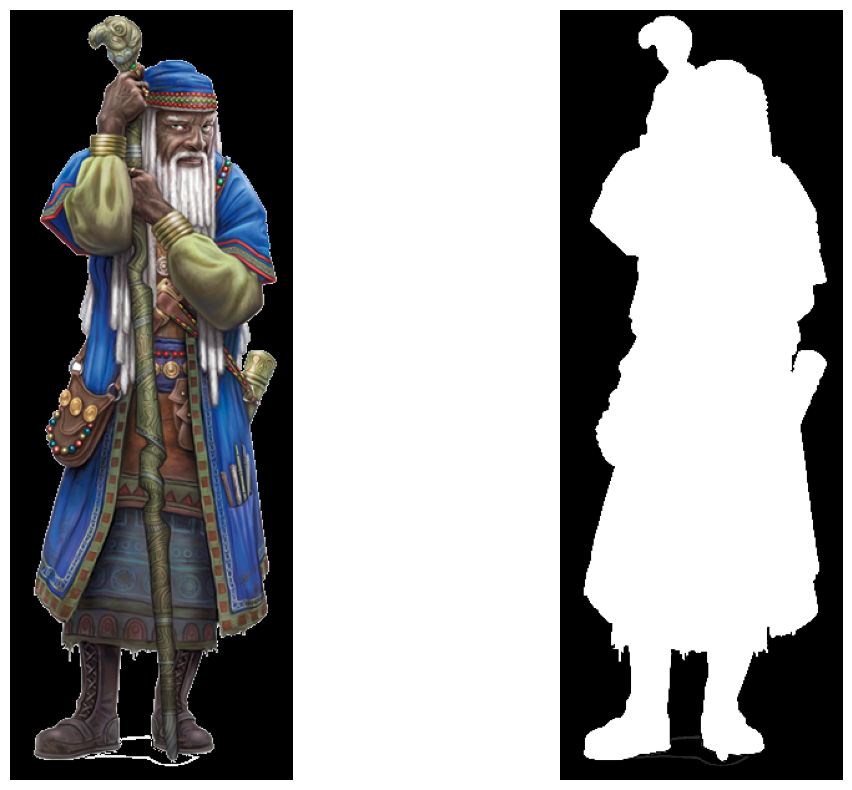

In [2]:
elpath = 'images/chars/wizard.png' # <-- change this path to examine different elements

content, mask = A2.load_alpha(elpath)

plt.subplot(1,2,1)
plt.imshow(content)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask, cmap = 'gray')
plt.axis('off')


plt.show()

# Office hours notes
Character is float
mask is [0:255] not [0:1]
get the minimum bounding box for the mask. look for the minimum and maximum y and x values for which the mask is 1 or zero
character height is relative to the background height

In [3]:
# getting the minimum bounding box for the content and mask
elpath = 'images/chars/owl.png' # <-- change this path to examine different elements
bkgpath = 'images/bkg/town_night.jpg' # <-- change this path to examine different backgrounds


content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)
loc = (0.63, 0.75) # <-- change these values to move the element around
hght = .18 # <-- change this value to change the element size

# finding the smallest row that
print(mask.shape)
# for i in len(range(mask.shape[0])):
#     if 
# Find the top border
np.arange(mask.shape[0])[::-1]

# t.shape, mask.shape[0]*mask.shape[1]

(720, 711)


array([719, 718, 717, 716, 715, 714, 713, 712, 711, 710, 709, 708, 707,
       706, 705, 704, 703, 702, 701, 700, 699, 698, 697, 696, 695, 694,
       693, 692, 691, 690, 689, 688, 687, 686, 685, 684, 683, 682, 681,
       680, 679, 678, 677, 676, 675, 674, 673, 672, 671, 670, 669, 668,
       667, 666, 665, 664, 663, 662, 661, 660, 659, 658, 657, 656, 655,
       654, 653, 652, 651, 650, 649, 648, 647, 646, 645, 644, 643, 642,
       641, 640, 639, 638, 637, 636, 635, 634, 633, 632, 631, 630, 629,
       628, 627, 626, 625, 624, 623, 622, 621, 620, 619, 618, 617, 616,
       615, 614, 613, 612, 611, 610, 609, 608, 607, 606, 605, 604, 603,
       602, 601, 600, 599, 598, 597, 596, 595, 594, 593, 592, 591, 590,
       589, 588, 587, 586, 585, 584, 583, 582, 581, 580, 579, 578, 577,
       576, 575, 574, 573, 572, 571, 570, 569, 568, 567, 566, 565, 564,
       563, 562, 561, 560, 559, 558, 557, 556, 555, 554, 553, 552, 551,
       550, 549, 548, 547, 546, 545, 544, 543, 542, 541, 540, 53

In [4]:

elpath = 'images/chars/bard.png' # <-- change this path to examine different elements
bkgpath = 'images/bkg/town_night.jpg' # <-- change this path to examine different backgrounds

elpath = 'images/chars/gladiator.png' 
bkgpath = 'images/bkg/barrow.jpg' 

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)
loc = (0.63, 0.75) # <-- change these values to move the element around
hght = .18 # <-- change this value to change the element size

loc = (0.5, 0.6) 
hght = 0.5 


elpath = 'images/chars/dragon.png'
bkgpath = 'images/bkg/cairn.jpg'

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)

loc = (0.8, 0.1) # <-- note the location near the image edge!
hght = 0.4


# print(content.shape)
# print(mask.shape)
# print(bkg.shape)

# resize the content and mask
(bkg_height, bkg_width, _)  = bkg.shape
(h,w,_) = content.shape

# aspect ratio W:H
aspect_ratio = w/h
new_height = int(bkg_height*hght)
new_width = int(new_height * aspect_ratio)
# resized_dimensions = (int(bkg_width*hght), int(bkg_height*hght)) 
resized_content = cv2.resize(content, (new_width,new_height)) 
resized_mask = cv2.resize(mask, (new_width,new_height))



# convert our mask to three channels of identical values so we cam compute the composite
reshaped_mask = cv2.cvtColor(resized_mask.astype('uint8'), cv2.COLOR_GRAY2RGB)
reshaped_mask = reshaped_mask / 255.0

# print(resized_content.shape)
# print(resized_mask.shape)
# print(bkg.shape)

# scale loc to coordinates on bkg
(bkg_height, bkg_width, _)  = bkg.shape
scaled_location = (int(loc[0] * bkg_width), int(loc[1] * bkg_height))[::-1]
# print(scaled_location[::-1])
# print(scaled_location)

# getting box dimensions for content projected on the bkg
# content_width = resized_content.shape[1]
# content_height = resized_content.shape[0]



left = scaled_location[1] - int(new_width/2)
bottom = scaled_location[0] - int(new_height/2)
right = left + new_width
top = bottom + new_height


left = max(scaled_location[1] - int(new_width/2), 0)
bottom = max(scaled_location[0] - int(new_height/2), 0)
right = min(left + new_width, bkg_width-1)
top = min(bottom + new_height, bkg_height-1)



# print(left, right, top, bottom)
# print(bkg.shape)

# form composite image using the reshaped images, mask, and specified dimesnsion
composite_img = bkg.copy()

# print(bkg.shape)
print(composite_img[bottom:top, left:right].shape)

print(resized_content.shape)
print(left, right, bottom, top)
print(reshaped_mask.shape)
composite_img[bottom:top, left:right] = resized_content*reshaped_mask + bkg[bottom:top, left:right]*(1-reshaped_mask)
plt.imshow(composite_img)
plt.show()

(825, 1522, 3)
(825, 1650, 3)
1964 3486 0 825
(825, 1650, 3)


ValueError: operands could not be broadcast together with shapes (825,1522,3) (825,1650,3) 

These next cells demonstrates how you can use `place_object` to construct scenes.

(244, 173, 3)
(244, 173, 3)
(244, 173, 3)


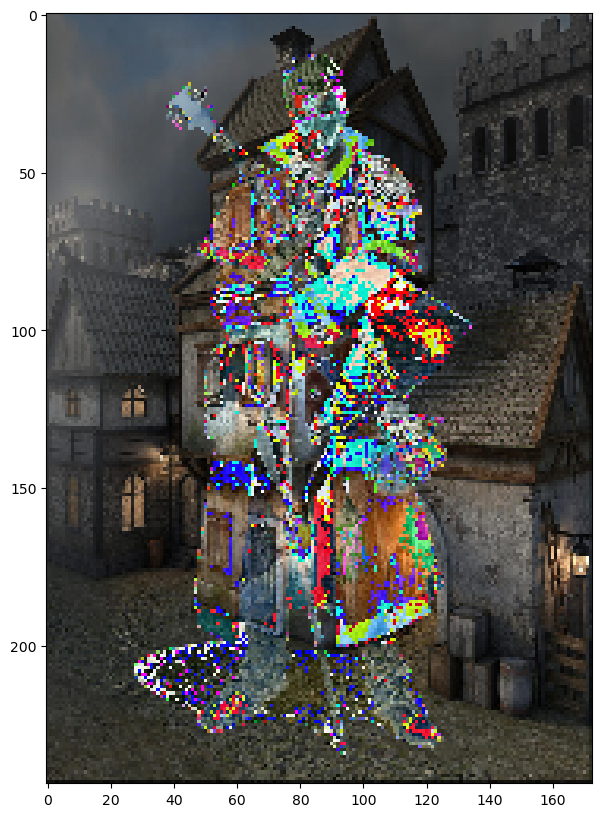

In [ ]:
elpath = 'images/chars/bard.png' # <-- change this path to examine different elements
bkgpath = 'images/bkg/town_night.jpg' # <-- change this path to examine different backgrounds

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)
# print(content.shape)
loc = (0.63, 0.75) # <-- change these values to move the element around
hght = 0.18 # <-- change this value to change the element size
resized_content = cv2.resize(content,None,fx=hght, fy=hght, interpolation = cv2.INTER_CUBIC)
resized_mask = cv2.resize(mask,None, fx = hght, fy=hght, interpolation=cv2.INTER_CUBIC)
# print(resized_content.shape)


# # Getting row and column information for masking
# scaled_location = (int(loc[0] * bkg.shape[0]), int(loc[1] * bkg.shape[1]))
# length, width ,_ = resized_content.shape
# left = scaled_location[1] - width//2 
# right = scaled_location[1] + width//2
# top = scaled_location[0] + length//2
# bottom = scaled_location[0] - length//2

(h,w,c) = resized_content.shape
# rescaling the background to the content image dimensions
background1 = cv2.resize(bkg, (w,h))

# resizing alpha mask
mask3c = cv2.cvtColor(mask.astype('uint8'), cv2.COLOR_GRAY2RGB)
resized_mask = cv2.resize(mask3c,None, fx = hght, fy=hght, interpolation=cv2.INTER_CUBIC)
print(resized_content.shape)
print(resized_mask.shape)
print(background1.shape)
# place mask over the background image
composite_img = resized_content*resized_mask + background1*(1-resized_mask)

plt.imshow(composite_img)
plt.show()

In [ ]:
elpath = 'images/chars/bard.png' # <-- change this path to examine different elements
bkgpath = 'images/bkg/town_night.jpg' # <-- change this path to examine different backgrounds

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)
print(content.shape)
loc = (0.63, 0.75) # <-- change these values to move the element around
hght = 0.18 # <-- change this value to change the element size
resized_content = cv2.resize(content,None,fx=hght, fy=hght, interpolation = cv2.INTER_CUBIC)
print(resized_content.shape)



(1358, 960, 3)
(244, 173, 3)


In [ ]:
elpath = 'images/chars/bard.png' # <-- change this path to examine different elements
bkgpath = 'images/bkg/town_night.jpg' # <-- change this path to examine different backgrounds

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)

loc = (0.63, 0.75) # <-- change these values to move the element around
hght = 0.18 # <-- change this value to change the element size

scene = A2.place_object(bkg, content, mask, loc, hght)

plt.imshow(scene)
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

The cell below uses identical structure to the cell above, it just provides another pre-set example and showcases the background without the element and the composite next to each other.

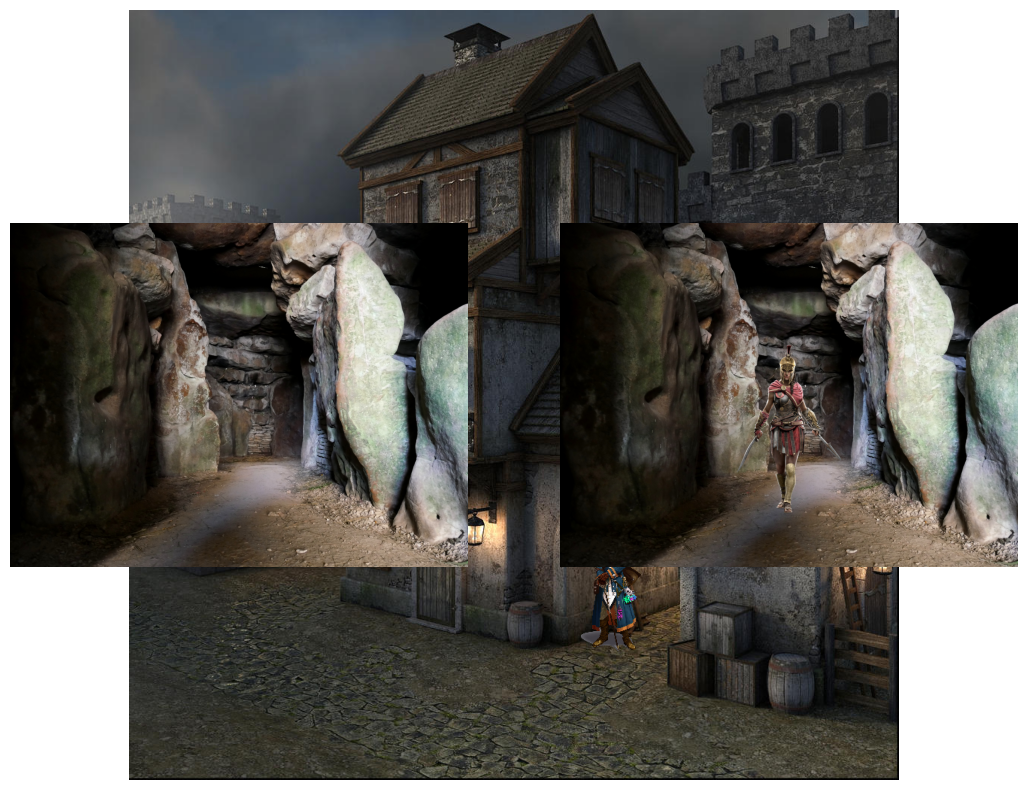

In [ ]:
elpath = 'images/chars/gladiator.png' 
bkgpath = 'images/bkg/barrow.jpg' 

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)

loc = (0.5, 0.6) 
hght = 0.5 

scene = A2.place_object(bkg, content, mask, loc, hght)

plt.subplot(1,2,1)
plt.imshow(bkg)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(scene)
plt.axis('off')

plt.show()

It's important to handle challenging situations such as objects going off the edge of the image without your function crashing. You should be sure to design and run other test inputs to make sure you can handle user inputs!

(320, 640, 3)
0 1523 206 825
1964 3487 0 619


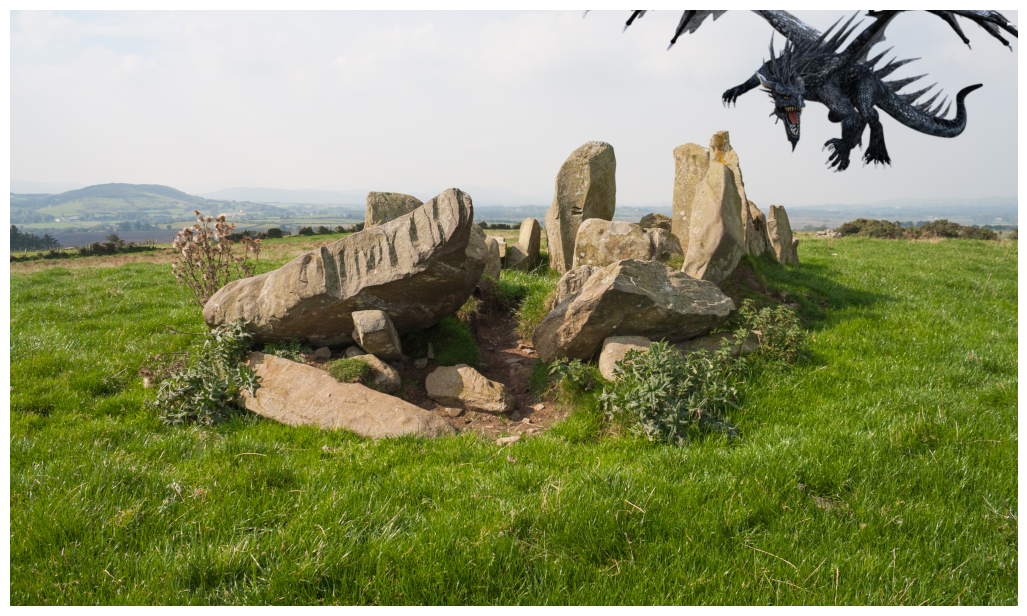

In [5]:
elpath = 'images/chars/dragon.png'
bkgpath = 'images/bkg/cairn.jpg'

content, mask = A2.load_alpha(elpath)
bkg = A2.load_img(bkgpath)

loc = (0.8, 0.1) # <-- note the location near the image edge!
hght = 0.4

scene = A2.place_object(bkg, content, mask, loc, hght)

plt.imshow(scene)
plt.axis('off')
plt.show()